#### Reading the data

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib widget
import seaborn as sns
import numpy as np
import math
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split

from IPython.display import Image

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Summary of missing data.')

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Summary of missing data.


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"West, Mrs. Edwy Arthur (Ada Mary Worth)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


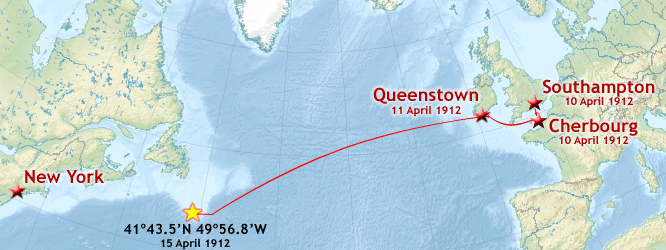

In [7]:
Image('https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png')

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Lets clean the data-set before proceeding to visualizations

#### Removing the age-gaps

Since we need to fill the missing ages that consitute 19% of the training data-set, we'll need to draw out information from the names. I am extracting prefixes from the "Name" column. Mr., Mrs., Master. and Miss. are included in several names. I have grouped these names together in different dataframes. Names not covered in such a list have been classified as 'others'.

In [14]:
def remove_age_gaps(df):

    misters = df[df['Name'].str.contains(' Mr. ')]
    masters = df[(df['Name'].str.contains(' Master. '))]
    miss = df[(df['Name'].str.contains(' Miss. '))]
    misses = df[(df['Name'].str.contains(' Mrs. '))]


    others=df[~df.isin(misters)]
    others=others[others['Name'].notna()]
    others=others[~others.isin(masters)]
    others=others[others['Name'].notna()]
    others=others[~others.isin(misses)]
    others=others[others['Name'].notna()]
    others=others[~others.isin(miss)]
    others=others[others['Name'].notna()]

    misters.reset_index(drop=True,inplace=True)
    masters.reset_index(drop=True,inplace=True)
    miss.reset_index(drop=True,inplace=True)
    misses.reset_index(drop=True,inplace=True)
    others.reset_index(drop=True,inplace=True)
    mean_age_misters = misters['Age'].mean()
    mean_age_masters = masters['Age'].mean()
    mean_age_misses = misses['Age'].mean()
    mean_age_miss = miss['Age'].mean()
    mean_age_others = others['Age'].mean()

    print('Mean age of people with title \'Mr.\' = ' + str(mean_age_misters))
    print('Mean age of people with title \'Master.\' = ' + str(mean_age_masters))
    print('Mean age of people with title \'Mrs.\' = ' + str(mean_age_misses))
    print('Mean age of people with title \'Miss.\' = ' + str(mean_age_miss))
    print('Mean age of people with other titles = ' + str(mean_age_others))
    
    misters['Age'].fillna(misters['Age'].mean(),inplace=True)
    masters['Age'].fillna(masters['Age'].mean(),inplace=True)
    miss['Age'].fillna(miss['Age'].mean(),inplace=True)
    misses['Age'].fillna(misses['Age'].mean(),inplace=True)
    others['Age'].fillna(others['Age'].mean(),inplace=True)
    
    df=pd.concat([misters,masters,miss,misses,others],ignore_index=True)
    return df

df=remove_age_gaps(df)

Mean age of people with title 'Mr.' = 32.368090452261306
Mean age of people with title 'Master.' = 4.574166666666667
Mean age of people with title 'Mrs.' = 35.898148148148145
Mean age of people with title 'Miss.' = 21.773972602739725
Mean age of people with other titles = 42.38461538461539


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500,NaN,S
1,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.000000,0.0,0.0,373450,8.0500,NaN,S
2,6.0,0.0,3.0,"Moran, Mr. James",male,32.368090,0.0,0.0,330877,8.4583,NaN,Q
3,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.000000,0.0,0.0,17463,51.8625,E46,S
4,13.0,0.0,3.0,"Saundercock, Mr. William Henry",male,20.000000,0.0,0.0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,767.0,0.0,1.0,"Brewe, Dr. Arthur Jackson",male,42.384615,0.0,0.0,112379,39.6000,NaN,C
887,797.0,1.0,1.0,"Leader, Dr. Alice (Farnham)",female,49.000000,0.0,0.0,17465,25.9292,D17,S
888,823.0,0.0,1.0,"Reuchlin, Jonkheer. John George",male,38.000000,0.0,0.0,19972,0.0000,NaN,S
889,849.0,0.0,2.0,"Harper, Rev. John",male,28.000000,0.0,1.0,248727,33.0000,NaN,S


In [16]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3.0,male,22.000000,1.0,0.0,A/5 21171,7.2500,NaN,S
1,0.0,3.0,male,35.000000,0.0,0.0,373450,8.0500,NaN,S
2,0.0,3.0,male,32.368090,0.0,0.0,330877,8.4583,NaN,Q
3,0.0,1.0,male,54.000000,0.0,0.0,17463,51.8625,E46,S
4,0.0,3.0,male,20.000000,0.0,0.0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,male,42.384615,0.0,0.0,112379,39.6000,NaN,C
887,1.0,1.0,female,49.000000,0.0,0.0,17465,25.9292,D17,S
888,0.0,1.0,male,38.000000,0.0,0.0,19972,0.0000,NaN,S
889,0.0,2.0,male,28.000000,0.0,1.0,248727,33.0000,NaN,S


In [17]:
print('Summary of missing data.')

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Summary of missing data.


,Total,%
Cabin,687,77.1
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


#### Removing the Cabin gaps
77% of the data is not known.
As per the data on the internet:
1. Classes A, B and C constituted the first class.
2. Classes D, and E constituted the second classes.
3. Classes F and G constituted the third class.

I am labelleing all unknown data and class T as 0.
First class as 1.
Second class as 2.
Third class as 3.

https://www.encyclopedia-titanica.org/cabins.html

In [18]:
df['Cabin'].fillna(0,inplace=True)
df.loc[df['Cabin'].str.contains('A', na=False),'Cabin']=1
df.loc[df['Cabin'].str.contains('B', na=False),'Cabin']=1
df.loc[df['Cabin'].str.contains('C', na=False),'Cabin']=1
df.loc[df['Cabin'].str.contains('D', na=False),'Cabin']=2
df.loc[df['Cabin'].str.contains('E', na=False),'Cabin']=2
df.loc[df['Cabin'].str.contains('F', na=False),'Cabin']=3
df.loc[df['Cabin'].str.contains('G', na=False),'Cabin']=3
df.loc[df['Cabin'].str.contains('T', na=False),'Cabin']=0

In [19]:
print('Summary of missing data.')

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Summary of missing data.


,Total,%
Embarked,2,0.2
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


#### Removing NaN entries under 'Embarked' heading
It is also possible to select a value for 'Embarked' field here. I am just choosing to eliminate these rows.

In [20]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
572,1.0,1.0,female,38.0,0.0,0.0,113572,80.0,1,NaN
850,1.0,1.0,female,62.0,0.0,0.0,113572,80.0,1,NaN


In [21]:
df = df[df['Embarked'].notna()]
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [22]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


Great. We finally have a complete data-set.

#### Ticket numbers
The ticket numbers are in various forms, like - Integer, String + Integer and only strings. I feel it would be useful to keep the ticket numbers without the strings. If there is a relation between the ticket numbers and any other variable, we'll know it in a short while.

In [23]:
df1 = df.copy()
df1.reset_index(drop=True,inplace=True)
for i in range(0,len(df1)):
    if ((len(df1.loc[i,'Ticket'].split())==1) & (df1.loc[i,'Ticket'][0].isnumeric()==False)):
        df1.loc[i,'Ticket']=0
        continue
    if (len(df1.loc[i,'Ticket'].split())>1):
        df1.loc[i,'Ticket'] = int(df1.loc[i,'Ticket'].split(None,2)[len(df1.loc[i,'Ticket'].split())-1])


In [24]:
df1['Ticket']=pd.to_numeric(df1['Ticket'])
df1['Cabin']=pd.to_numeric(df1['Cabin'])
df1['SibSp']=pd.to_numeric(df1['SibSp'].astype(int))
df1['Parch']=pd.to_numeric(df1['Parch'].astype(int))

In [25]:
df=df1
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3.0,male,22.000000,1,0,21171,7.2500,0,S
1,0.0,3.0,male,35.000000,0,0,373450,8.0500,0,S
2,0.0,3.0,male,32.368090,0,0,330877,8.4583,0,Q
3,0.0,1.0,male,54.000000,0,0,17463,51.8625,2,S
4,0.0,3.0,male,20.000000,0,0,2151,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,male,42.384615,0,0,112379,39.6000,0,C
885,1.0,1.0,female,49.000000,0,0,17465,25.9292,2,S
886,0.0,1.0,male,38.000000,0,0,19972,0.0000,0,S
887,0.0,2.0,male,28.000000,0,1,248727,33.0000,0,S


## Now, lets visualize.

#### Survived vs everything else

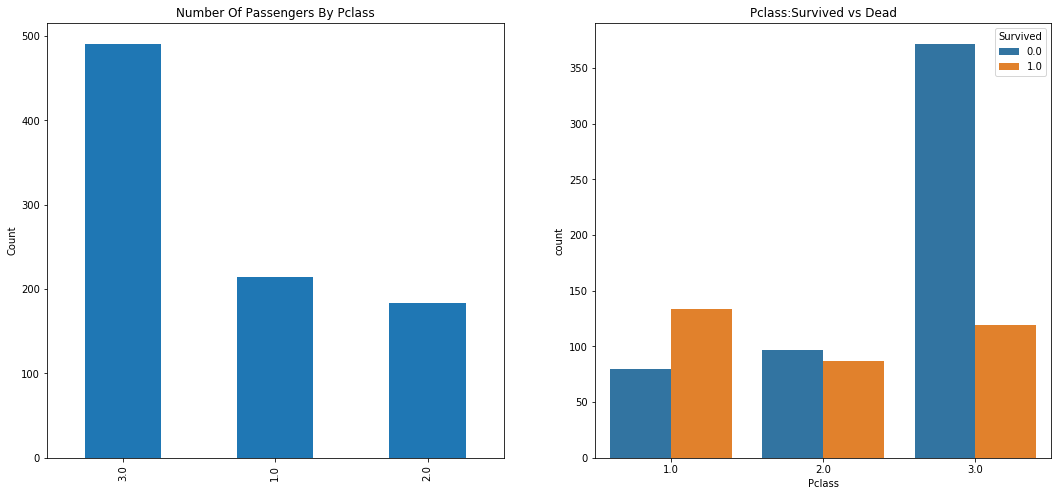

In [26]:
pd.crosstab(df.Pclass,df.Survived,margins=True)
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

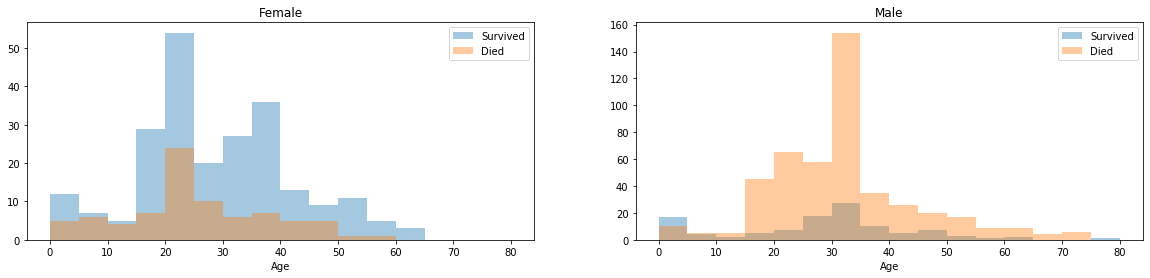

In [27]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80], label = 'Survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80], label = 'Died', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80], label = 'Survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80], label = 'Died', ax = axes[1], kde = False)
ax.legend()
dummy = ax.set_title('Male')

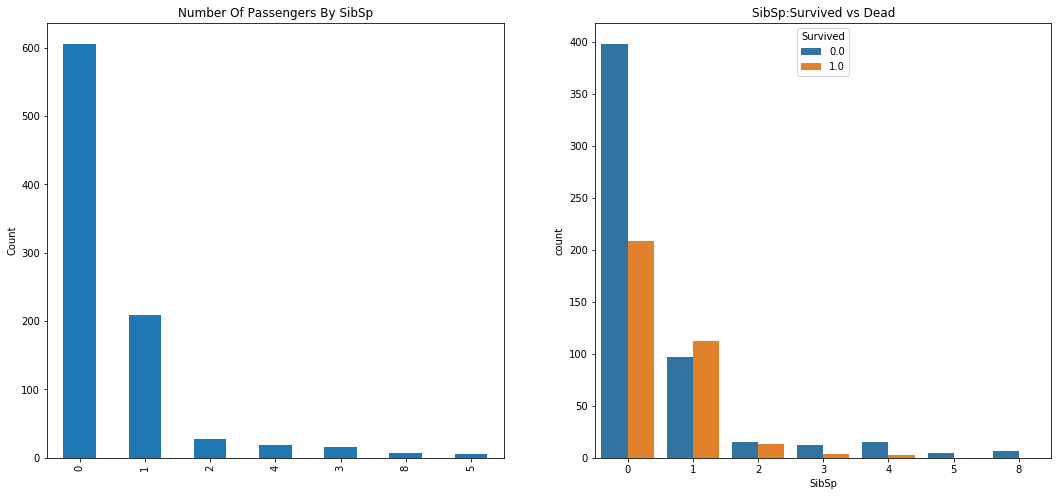

In [28]:
pd.crosstab(df.SibSp,df.Survived,margins=True)
f,ax=plt.subplots(1,2,figsize=(18,8))
df['SibSp'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By SibSp')
ax[0].set_ylabel('Count')
sns.countplot('SibSp',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('SibSp:Survived vs Dead')
plt.show()

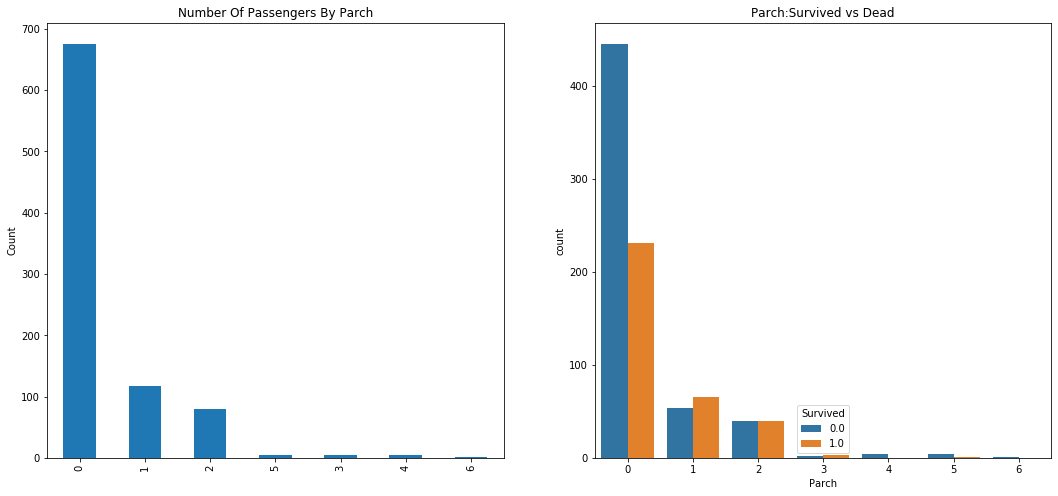

In [29]:
pd.crosstab(df.Parch,df.Survived,margins=True)
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Parch'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Parch')
ax[0].set_ylabel('Count')
sns.countplot('Parch',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Parch:Survived vs Dead')
plt.show()

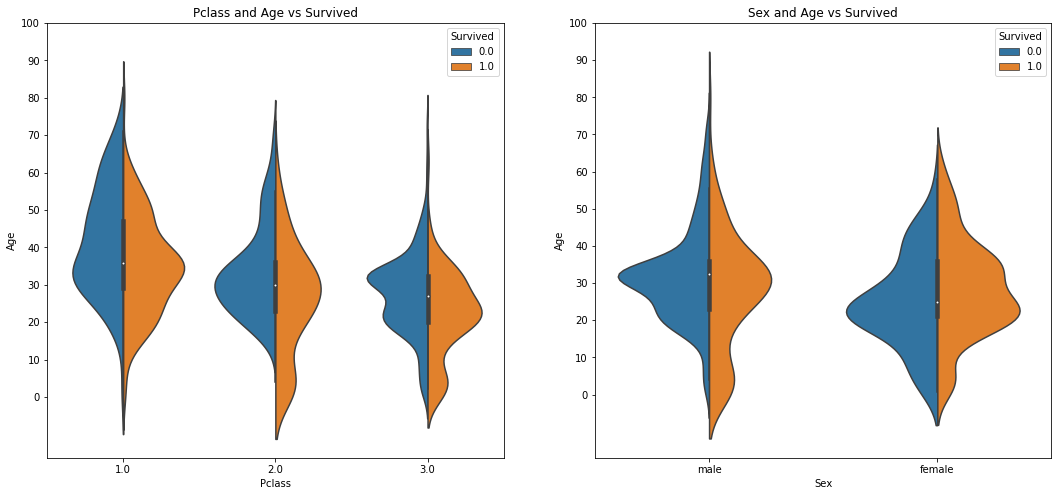

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

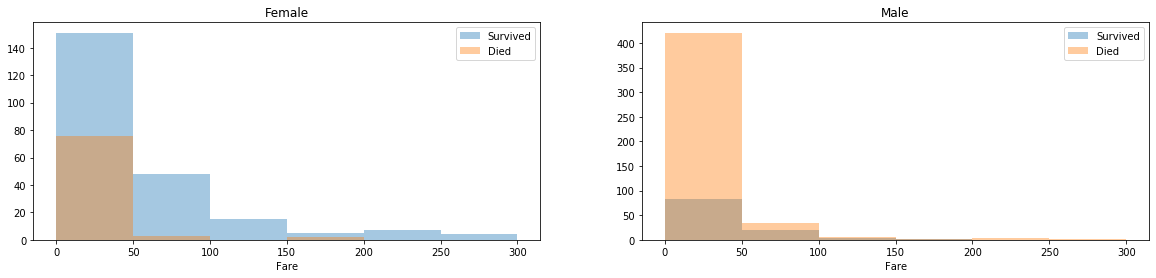

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Fare, bins=[0,50,100,150,200,250,300], label = 'Survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Fare, bins=[0,50,100,150,200,250,300], label = 'Died', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Fare, bins=[0,50,100,150,200,250,300], label = 'Survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Fare, bins=[0,50,100,150,200,250,300], label = 'Died', ax = axes[1], kde = False)
ax.legend()
dummy = ax.set_title('Male')

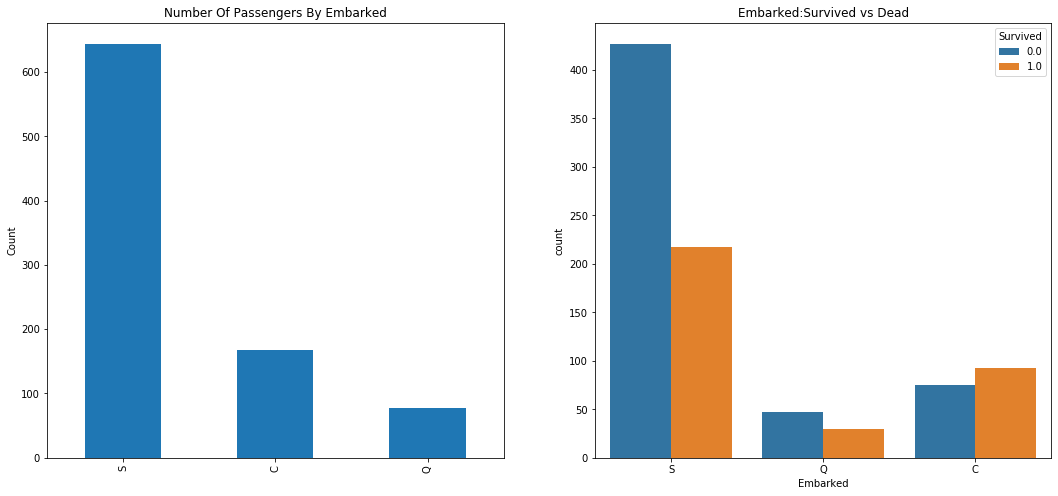

In [32]:
pd.crosstab(df.Embarked,df.Survived,margins=True)
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Embarked'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Embarked')
ax[0].set_ylabel('Count')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

### Corelation Heatmaps

To get a co-relation matrix, we'll rename 'males' and 'females' to 1 and 0, and 'C', 'Q' and 'S' to 0, 1 and 2 respectively.
Lets also drop 'Cabin', we'll take up clustering at a later date and then fill it in.

In [33]:
df.drop('Cabin',axis=1,inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])
df

df['Embarked'] = LE.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3.0,1,22.000000,1,0,21171,7.2500,2
1,0.0,3.0,1,35.000000,0,0,373450,8.0500,2
2,0.0,3.0,1,32.368090,0,0,330877,8.4583,1
3,0.0,1.0,1,54.000000,0,0,17463,51.8625,2
4,0.0,3.0,1,20.000000,0,0,2151,8.0500,2
...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,1,42.384615,0,0,112379,39.6000,0
885,1.0,1.0,0,49.000000,0,0,17465,25.9292,2
886,0.0,1.0,1,38.000000,0,0,19972,0.0000,2
887,0.0,2.0,1,28.000000,0,1,248727,33.0000,2


In [35]:
corr=df.corr()

In [36]:
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.094009,-0.034040,0.083151,-0.094989,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.340375,0.081656,0.016824,0.283840,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.122712,-0.116348,-0.247508,0.075002,-0.179958,0.110320
Age,-0.094009,-0.340375,0.122712,1.000000,-0.267052,-0.195929,-0.098846,0.088198,-0.026084
SibSp,-0.034040,0.081656,-0.116348,-0.267052,1.000000,0.414542,0.046659,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.195929,0.414542,1.000000,-0.032839,0.217532,0.040449
Ticket,-0.094989,0.283840,0.075002,-0.098846,0.046659,-0.032839,1.000000,-0.154941,0.192766
Fare,0.255290,-0.548193,-0.179958,0.088198,0.160887,0.217532,-0.154941,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.026084,0.068900,0.040449,0.192766,-0.226311,1.000000


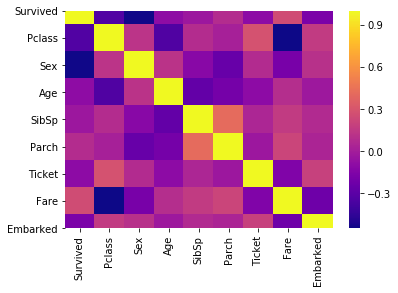

In [37]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="plasma")

## ANOVA

We'll take a categorical variable, say 'Embarked', and we want to understand its corelation with Age. Since there are three groups within the 'Embarked' heading

In [38]:
df2=pd.read_csv('train.csv')
df_anova=df2[['Embarked','Age']]
df_anova = df_anova[df_anova['Age'].notna()]
df_anova = df_anova[df_anova['Embarked'].notna()]
df_anova.dropna()
df_anova

,Embarked,Age
0,S,22.0
1,C,38.0
2,S,26.0
3,S,35.0
4,S,35.0
...,...,...
885,Q,39.0
886,S,27.0
887,S,19.0
889,C,26.0


In [39]:
grouped_anova=df_anova.groupby(['Embarked'])
anova_results=stats.f_oneway(grouped_anova.get_group('C')['Age'],grouped_anova.get_group('Q')['Age'],grouped_anova.get_group('S')['Age'])

In [40]:
anova_results

F_onewayResult(statistic=0.6366398124910263, pvalue=0.5293693792571084)

# Examples of Feature Engineering Techniques

## Binning

In [41]:
bins = [0,20,60,80]
group_names=['Young','Middle Aged','Elderly']
df['Age-Binned'] = pd.cut(df['Age'],bins,labels=group_names,include_lowest=True)

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age-Binned
0,0.0,3.0,1,22.000000,1,0,21171,7.2500,2,Middle Aged
1,0.0,3.0,1,35.000000,0,0,373450,8.0500,2,Middle Aged
2,0.0,3.0,1,32.368090,0,0,330877,8.4583,1,Middle Aged
3,0.0,1.0,1,54.000000,0,0,17463,51.8625,2,Middle Aged
4,0.0,3.0,1,20.000000,0,0,2151,8.0500,2,Young
...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,1,42.384615,0,0,112379,39.6000,0,Middle Aged
885,1.0,1.0,0,49.000000,0,0,17465,25.9292,2,Middle Aged
886,0.0,1.0,1,38.000000,0,0,19972,0.0000,2,Middle Aged
887,0.0,2.0,1,28.000000,0,1,248727,33.0000,2,Middle Aged


In [43]:
df.drop(['Age-Binned'],axis=1,inplace=True)

## One-Hot Encoding

In [44]:
df1=pd.read_csv('train.csv')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
pd.get_dummies(df1['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


## Data Normalization

Can be done as:
1. Simple Feature Scaling
2. Min-Max
3. Z Score

I am normalizing using Z-Score.

In [46]:
df[['Age','Ticket','Fare']]

,Age,Ticket,Fare
0,22.000000,21171,7.2500
1,35.000000,373450,8.0500
2,32.368090,330877,8.4583
3,54.000000,17463,51.8625
4,20.000000,2151,8.0500
...,...,...,...
884,42.384615,112379,39.6000
885,49.000000,17465,25.9292
886,38.000000,19972,0.0000
887,28.000000,248727,33.0000


In [47]:
df2=df.copy()
df2['Age']=(df2['Age']-df2['Age'].mean())/df2['Age'].std()
df2['Ticket']=(df2['Ticket']-df2['Ticket'].mean())/df2['Ticket'].std()
df2['Fare']=(df2['Fare']-df2['Fare'].mean())/df2['Fare'].std()

In [48]:
df2[['Age','Ticket','Fare']]

,Age,Ticket,Fare
0,-0.582053,-0.420366,-0.499958
1,0.399417,0.115730,-0.483861
2,0.200714,0.050942,-0.475645
3,1.833872,-0.426009,0.397723
4,-0.733048,-0.449311,-0.483861
...,...,...,...
884,0.956938,-0.281566,0.150980
885,1.456384,-0.426006,-0.124100
886,0.625910,-0.422191,-0.645841
887,-0.129067,-0.074073,0.018176


## Log Transformation

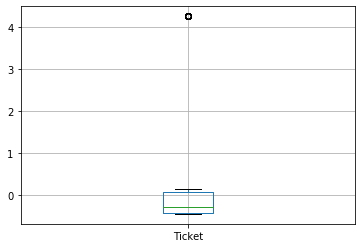

In [49]:
pd.DataFrame(df2['Ticket']).boxplot()

In [50]:
lt = pd.DataFrame(df2['Ticket']).applymap(lambda x: np.log(x+1))

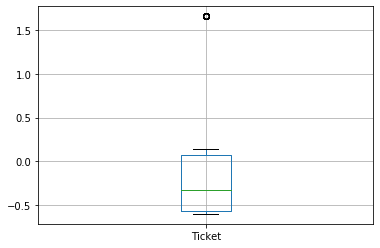

In [51]:
lt.boxplot()